# Digest of Education Statistics

### Project 1: ETL, EDA, Ridge Regression Model

## *Author: Marzieh Safari*

## Source for data: 
<a href='https://nces.ed.gov/ipeds/'> IPEDS - National Center for Education Statistics (NCES) </a>

##### *Data on year: 2020*

## Objectives:
#### Modeling the Cost Function of States' Education System (degree-granting postsecondary institutions):  
* Answers the question: "How does the specific demographic and institutional mix of a state drive its educational spending?"

* Investigated factors:   
        1. race/ethnicity,  
        2. sex,  
        and  
        3. level of institution

## Key Findings:
#### **1. The 38% Rule:**  
The optimized model achieved an $R^2$ score of 0.38. This reveals that while student demographics are a major factor, they account for roughly 38% of the variation in spending. This suggests that the remaining 62% is likely driven by non-enrollment factors such as state-specific legislation, cost-of-living indices, and geographic infrastructure.
#### **2. Linear Simplicity Over Complexity:**  
Through Hyperparameter Tuning (Grid Search), the model identified that a Linear relationship (Degree 1) was more reliable than complex polynomial models. This indicates that education costs scale predictably with enrollment shifts.
#### **3. Top Spending Drivers:**  
The analysis identified % Non-Resident Alien Students, % Private Post-baccalaureate Non-Profit 4-Year, % Full-Time Male Students, and % Asian Students as the strongest predictors of increased per-student costs.

### Installing and importing required libraries:

In [ ]:
%pip install pandas openpyxl xlrd

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing data sets - Data Wrangling:

#### 1. Enrollment based on Race/ethnicity:

In [12]:
df_race = pd.read_excel(r'D:\Data Science\python-codes\Projects\IPEDS\tabn306.60.xls', header=[0], skiprows=2)
df_race.drop(columns=df_race.columns[10:18], inplace=True)
df_race.drop(index=[0, 1], inplace=True)
df_race.drop(df_race.index[51:65], inplace=True)
df_race.reset_index(drop=True, inplace=True)
df_race.columns = ['State', 'Total', 'White', 'Black', 'Hispanic', 'Asian', 'Pasific_Islander', 'Am_Ind_Alaska_Native', 'Two_more_races', 'Non_resident_alien']
df_race.rename(columns={'Unnamed: 0': 'State'}, inplace=True)
df_race['State'] = df_race['State'].astype(str).str.strip()
df_race.head()

,State,Total,White,Black,Hispanic,Asian,Pasific_Islander,Am_Ind_Alaska_Native,Two_more_races,Non_resident_alien
0,Alabama,292181.0,182968.0,72290.0,12514.0,6135.0,357.0,1607.0,8696.0,7614.0
1,Alaska,22106.0,12757.0,700.0,1923.0,1221.0,488.0,2262.0,2380.0,375.0
2,Arizona,600103.0,286522.0,77614.0,153650.0,25342.0,2869.0,13046.0,26200.0,14860.0
3,Arkansas,149294.0,100035.0,22481.0,11608.0,3076.0,207.0,1021.0,6741.0,4125.0
4,California,2579991.0,678875.0,153679.0,1079060.0,397897.0,11910.0,8341.0,123588.0,126641.0


In [ ]:
df_race.tail(15)

In [ ]:
df_race.isnull().sum()

In [ ]:
df_race.info()

In [ ]:
# Convert columns to appropriate data types
df_race = df_race.convert_dtypes() 
df_race.head()

In [ ]:
df_race.info()

In [ ]:
# Strip hidden spaces from column names
df_race.columns = df_race.columns.str.strip()

#### Feature Engineering: Create percentages

In [15]:
# Calculate percentage of White students
df_race['pct_White'] = df_race['White'] / df_race['Total']
df_race['pct_Black'] = df_race['Black'] / df_race['Total']
df_race['pct_Hispanic'] = df_race['Hispanic'] / df_race['Total']
df_race['pct_Asian'] = df_race['Asian'] / df_race['Total']
df_race['pct_Pasific_Islander'] = df_race['Pasific_Islander'] / df_race['Total']
df_race['pct_Am_Ind_Alaska_Native'] = df_race['Am_Ind_Alaska_Native'] / df_race['Total']
df_race['pct_Two_more_races'] = df_race['Two_more_races'] / df_race['Total']
df_race['pct_Non_resident_alien'] = df_race['Non_resident_alien'] / df_race['Total']
#print(df_race.head())
df_race.drop(columns=df_race.columns[2:10], inplace=True)
df_race.head()

,State,Total,pct_White,pct_Black,pct_Hispanic,pct_Asian,pct_Pasific_Islander,pct_Am_Ind_Alaska_Native,pct_Two_more_races,pct_Non_resident_alien
0,Alabama,292181,0.626215,0.247415,0.04283,0.020997,0.001222,0.0055,0.029762,0.026059
1,Alaska,22106,0.577083,0.031666,0.08699,0.055234,0.022075,0.102325,0.107663,0.016964
2,Arizona,600103,0.477455,0.129334,0.256039,0.042229,0.004781,0.02174,0.043659,0.024762
3,Arkansas,149294,0.670054,0.150582,0.077753,0.020604,0.001387,0.006839,0.045153,0.02763
4,California,2579991,0.263131,0.059566,0.418242,0.154224,0.004616,0.003233,0.047902,0.049086


#### 2. Enrollment based on Sex, for full-time and part-time:

In [ ]:
df_sex = pd.read_excel(r'D:\Data Science\python-codes\Projects\IPEDS\tabn304.30.xlsx', header=[0], skiprows=2)
df_sex.drop(columns=df_sex.columns[6:12], inplace=True)
df_sex.columns = ['State', 'Total', 'FT_Male', 'FT_Female', 'PT_Male', 'PT_Female']
df_sex.drop(index=[0, 1, 2], inplace=True)
df_sex.drop(df_sex.index[51:65], inplace=True)
df_sex.reset_index(drop=True, inplace=True)
df_sex['State'] = df_sex['State'].astype(str).str.strip()
df_sex.head()

In [ ]:
df_sex.tail(15)

In [ ]:
df_sex.isnull().sum()

In [ ]:
df_sex.info()

In [ ]:
# Convert columns to appropriate data types
df_sex = df_sex.convert_dtypes() 
df_sex.head()

In [ ]:
df_sex.info()

In [ ]:
# Strip hidden spaces from column names
df_sex.columns = df_sex.columns.str.strip()

#### Feature Engineering: Create percentages

In [ ]:
# Calculate percentage of White students
df_sex['pct_FT_Male'] = df_sex['FT_Male'] / df_sex['Total']
df_sex['pct_FT_Female'] = df_sex['FT_Female'] / df_sex['Total']
df_sex['pct_PT_Male'] = df_sex['PT_Male'] / df_sex['Total']
df_sex['pct_PT_Female'] = df_sex['PT_Female'] / df_sex['Total']
#print(df_sex.head())
df_sex.drop(columns=df_sex.columns[2:6], inplace=True)
df_sex.head()

#### 3. Enrollment based on Institution level:

In [ ]:
df_level = pd.read_excel(r'D:\Data Science\python-codes\Projects\IPEDS\tabn304.80.xls', skiprows=5)
df_level.drop(columns=df_level.columns[13], inplace=True)
df_level.columns = ['State', 'Pub_Und_Total', 'Pub_Und_4y', 'Pub_Und_2y', 'Pub_Post_bac', 'Pri_Und_Total', 'Pri_Und_Non_prof_4y', 'Pri_Und_For_prof_4y', 'Pri_Und_Non_prof_2y', 'Pri_Und_For_prof_2y', 'Pri_Post_bac_Total', 'Pri_Post_bac_Non_prof_4y', 'Pri_Post_bac_For_prof_4y']
df_level.drop(df_level.index[51:], inplace=True)
df_level['State'] = df_level['State'].astype(str).str.strip()
df_level = df_level.replace({'†': np.nan})
df_level = df_level.convert_dtypes()
df_level.head()

In [ ]:
df_level.tail(15)

In [ ]:
df_level.isnull().sum()

In [ ]:
df_level.info()

In [ ]:
# Strip hidden spaces from column names
df_level.columns = df_level.columns.str.strip()

#### Feature Engineering: Create percentages

In [ ]:
# Calculate percentage of White students
df_level['pct_Pub_Und_Total'] = df_level['Pub_Und_Total'] / df_race['Total']
df_level['pct_Pub_Und_4y'] = df_level['Pub_Und_4y'] / df_race['Total']
df_level['pct_Pub_Und_2y'] = df_level['Pub_Und_2y'] / df_race['Total']
df_level['pct_Pub_Post_bac'] = df_level['Pub_Post_bac'] / df_race['Total']
df_level['pct_Pri_Und_Total'] = df_level['Pri_Und_Total'] / df_race['Total']
df_level['pct_Pri_Und_Non_prof_4y'] = df_level['Pri_Und_Non_prof_4y'] / df_race['Total']
df_level['pct_Pri_Und_For_prof_4y'] = df_level['Pri_Und_For_prof_4y'] / df_race['Total']
df_level['pct_Pri_Und_Non_prof_2y'] = df_level['Pri_Und_Non_prof_2y'] / df_race['Total']
df_level['pct_Pri_Und_For_prof_2y'] = df_level['Pri_Und_For_prof_2y'] / df_race['Total']
df_level['pct_Pri_Post_bac_Total'] = df_level['Pri_Post_bac_Total'] / df_race['Total']
df_level['pct_Pri_Post_bac_Non_prof_4y'] = df_level['Pri_Post_bac_Non_prof_4y'] / df_race['Total']
df_level['pct_Pri_Post_bac_For_prof_4y'] = df_level['Pri_Post_bac_For_prof_4y'] / df_race['Total']
#print(df_level.head())
df_level.drop(columns=df_level.columns[1:13], inplace=True)
df_level.head()

#### 4. Total Expenditure for public and private degree-granting postsecondary institutions:

##### 4.1. Total Edpenditure for Public degree-granting postsecondary institutions:

In [ ]:
df_pub_exp = pd.read_excel(r'D:\Data Science\python-codes\Projects\IPEDS\tabn334.20.xls', skiprows=6)
df_pub_exp.drop(columns=df_pub_exp.columns[1:6], inplace=True)
df_pub_exp.columns = ['State', 'Pub_Exp_All_Total', 'Pub_Exp_All_Inst', 'Pub_Exp_4y_Total', 'Pub_Exp_4y_Inst', 'Pub_Exp_2y_Total', 'Pub_Exp_2y_Inst']
df_pub_exp.drop(df_pub_exp.index[51:], inplace=True)
df_pub_exp['State'] = df_pub_exp['State'].astype(str).str.strip()
df_pub_exp = df_pub_exp.replace({'†': np.nan})
df_pub_exp = df_pub_exp.round()
df_pub_exp = df_pub_exp.convert_dtypes()
df_pub_exp.head()

In [ ]:
df_pub_exp.tail(15)

In [ ]:
df_pub_exp.isnull().sum()

In [ ]:
df_pub_exp.info()

##### 4.2. Total Edpenditure for Private degree-granting postsecondary institutions:

In [ ]:
df_pri_exp = pd.read_excel(r'D:\Data Science\python-codes\Projects\IPEDS\tabn334.70.xls', skiprows=5)
df_pri_exp.drop(columns=df_pri_exp.columns[1:6], inplace=True)
df_pri_exp.drop(columns=df_pri_exp.columns[2:7], inplace=True)
df_pri_exp.columns = ['State', 'Pri_Exp_Non_Pro_Total', 'Pri_Exp_For_Pro_Total']
df_pri_exp.drop(df_pri_exp.index[51:], inplace=True)
df_pri_exp['State'] = df_pri_exp['State'].astype(str).str.strip()
df_pri_exp = df_pri_exp.replace({'†': np.nan})
df_pri_exp = df_pri_exp.round()
df_pri_exp = df_pri_exp.convert_dtypes()
df_pri_exp.head()

In [ ]:
df_pri_exp.tail(15)

In [ ]:
df_pri_exp.isnull().sum()

In [ ]:
df_pri_exp.info()

#### Feature Engineering: Create a whole Total Expenditure

In [ ]:
df_Exp_Total = pd.merge(df_pub_exp, df_pri_exp, on='State')
# Calculate the total by filling NAs with 0 temporarily
df_Exp_Total['Total_Exp'] = (
    df_Exp_Total['Pub_Exp_All_Total'].fillna(0) + 
    df_Exp_Total['Pri_Exp_Non_Pro_Total'].fillna(0) + 
    df_Exp_Total['Pri_Exp_For_Pro_Total'].fillna(0)
)
df_Exp_Total.head()

In [ ]:
df_Exp_Total.tail(15)

## Feature engineering:
### Define Target "Per-Student" Expenditure (Spending per student):

#### Importantance: 

Expenditure Per Student (Total Expenditure / Total Enrollment) as the target variable,  
Allows to see how the composition of the students affects the cost, regardless of the state's size.

In [ ]:
# Get the total enrollment dataframe with state names
df_race_Enroll = df_race.iloc[:, :2]
df_race_Enroll.head()

In [ ]:
# Calculate Per Student Expenditure
df_Exp_Total['Per_Student_Exp'] = (df_Exp_Total['Total_Exp'].fillna(0) / (df_race_Enroll['Total'].fillna(0)))
df_Exp_Total['Per_Student_Exp'] = df_Exp_Total['Per_Student_Exp'].round(2)
df_Exp_Total.head()

In [ ]:
df_Exp_Total.tail(15)

## SQL for joins:

### Create SQL database for all the tables:

In [ ]:
%pip install ipython-sql PrettyTable

In [28]:
import prettytable
prettytable.DEFAULT = 'DEFAULT'
import sqlite3
con = sqlite3.connect('FinalDB.db')
cur = con.cursor()
%reload_ext sql

In [29]:
df_level.to_sql('df_level', con, if_exists='replace', index=False, method='multi')
df_race.to_sql('df_race', con, if_exists='replace', index=False, method='multi')
df_sex.to_sql('df_sex', con, if_exists='replace', index=False, method='multi')
df_Exp_Total.to_sql('df_Exp_Total', con, if_exists='replace', index=False, method='multi')

51

In [30]:
%sql sqlite:///FinalDB.db

#### Join tables based on States:

In [ ]:
%%sql result_df <<
SELECT 
    E.State,
    E.Per_Student_Exp,
    R.Total AS Total_Enrollments,
    R.pct_White,
    R.pct_Black,
    R.pct_Hispanic,
    R.pct_Asian,
    R.pct_Pasific_Islander,
    R.pct_Am_Ind_Alaska_Native,
    R.pct_Two_more_races,
    R.pct_Non_resident_alien,
    S.pct_FT_Male,
    S.pct_FT_Female,
    S.pct_PT_Male,
    S.pct_PT_Female,
    L.pct_Pub_Und_Total,
    L.pct_Pub_Und_4y,
    L.pct_Pub_Und_2y,
    L.pct_Pub_Post_bac,
    L.pct_Pri_Und_Total,
    L.pct_Pri_Und_Non_prof_4y,
    L.pct_Pri_Und_For_prof_4y,
    L.pct_Pri_Und_Non_prof_2y,
    L.pct_Pri_Und_For_prof_2y,
    L.pct_Pri_Post_bac_Total,
    L.pct_Pri_Post_bac_Non_prof_4y,
    L.pct_Pri_Post_bac_For_prof_4y
FROM df_Exp_Total AS E
JOIN df_race AS R ON E.State = R.State
JOIN df_sex AS S ON E.State = S.State
JOIN df_level AS L ON E.State = L.State;

In [32]:
# Save the 'last result' into a new variable
df_final = result_df.DataFrame()
# Verify the type and data
#print(type(result_df))
display(df_final)

,State,Per_Student_Exp,Total_Enrollments,pct_White,pct_Black,pct_Hispanic,pct_Asian,pct_Pasific_Islander,pct_Am_Ind_Alaska_Native,pct_Two_more_races,...,pct_Pub_Und_2y,pct_Pub_Post_bac,pct_Pri_Und_Total,pct_Pri_Und_Non_prof_4y,pct_Pri_Und_For_prof_4y,pct_Pri_Und_Non_prof_2y,pct_Pri_Und_For_prof_2y,pct_Pri_Post_bac_Total,pct_Pri_Post_bac_Non_prof_4y,pct_Pri_Post_bac_For_prof_4y
0,Alabama,32.11,292181,0.626215,0.247415,0.042830,0.020997,0.001222,0.005500,0.029762,...,0.242490,0.143284,0.118943,0.065456,0.051602,NaN,0.001886,0.037412,0.018441,0.018971
1,Alaska,33.91,22106,0.577083,0.031666,0.086990,0.055234,0.022075,0.102325,0.107663,...,NaN,0.084050,0.038768,0.015923,NaN,0.004207,0.018637,0.008188,0.008188,NaN
2,Arizona,17.49,600103,0.477455,0.129334,0.256039,0.042229,0.004781,0.021740,0.043659,...,0.255093,0.066334,0.287014,0.009413,0.258784,NaN,0.018817,0.115087,0.010140,0.104947
3,Arkansas,32.41,149294,0.670054,0.150582,0.077753,0.020604,0.001387,0.006839,0.045153,...,0.266153,0.121961,0.093319,0.084049,0.002726,0.006290,0.000255,0.016076,0.015580,0.000496
4,California,38.86,2579991,0.263131,0.059566,0.418242,0.154224,0.004616,0.003233,0.047902,...,0.436917,0.047549,0.104239,0.062717,0.029462,0.000241,0.011818,0.072674,0.061192,0.011482
5,Colorado,25.63,362267,0.604049,0.083135,0.184770,0.039899,0.002821,0.010169,0.049141,...,0.053676,0.112356,0.187403,0.052130,0.097522,NaN,0.037751,0.067550,0.039002,0.028548
6,Connecticut,56.17,186717,0.548322,0.130326,0.161839,0.058291,0.001114,0.002565,0.044259,...,0.207876,0.070261,0.321824,0.252328,0.069496,NaN,NaN,0.126593,0.121258,0.005334
7,Delaware,26.61,58678,0.538243,0.210147,0.102048,0.039027,0.001329,0.003085,0.039981,...,NaN,0.083387,0.193838,0.185930,0.006084,0.001824,NaN,0.102202,0.101571,0.000631
8,District of Columbia,56.49,97481,0.418564,0.244704,0.111550,0.076158,0.001836,0.003785,0.039505,...,NaN,0.005755,0.501503,0.414932,0.080241,NaN,0.006329,0.458017,0.420964,0.037053
9,Florida,22.39,1027331,0.421686,0.167352,0.291367,0.038835,0.001847,0.002600,0.035640,...,0.019012,0.074267,0.203428,0.126561,0.047243,0.009123,0.020502,0.053699,0.049437,0.004263


In [33]:
df_final.to_csv('Education_Statistics.csv', index=False)

print("File saved successfully!")

File saved successfully!


In [ ]:
cur.close()
con.close()

### Final checks on Data:


In [35]:
df_final = pd.read_csv(r'D:\Data Science\python-codes\Projects\IPEDS\Education_Statistics.csv')
df_final.drop(columns=df_final.columns[2], inplace=True)
df_final.head()

,State,Per_Student_Exp,pct_White,pct_Black,pct_Hispanic,pct_Asian,pct_Pasific_Islander,pct_Am_Ind_Alaska_Native,pct_Two_more_races,pct_Non_resident_alien,...,pct_Pub_Und_2y,pct_Pub_Post_bac,pct_Pri_Und_Total,pct_Pri_Und_Non_prof_4y,pct_Pri_Und_For_prof_4y,pct_Pri_Und_Non_prof_2y,pct_Pri_Und_For_prof_2y,pct_Pri_Post_bac_Total,pct_Pri_Post_bac_Non_prof_4y,pct_Pri_Post_bac_For_prof_4y
0,Alabama,32.11,0.626215,0.247415,0.042830,0.020997,0.001222,0.005500,0.029762,0.026059,...,0.242490,0.143284,0.118943,0.065456,0.051602,NaN,0.001886,0.037412,0.018441,0.018971
1,Alaska,33.91,0.577083,0.031666,0.086990,0.055234,0.022075,0.102325,0.107663,0.016964,...,NaN,0.084050,0.038768,0.015923,NaN,0.004207,0.018637,0.008188,0.008188,NaN
2,Arizona,17.49,0.477455,0.129334,0.256039,0.042229,0.004781,0.021740,0.043659,0.024762,...,0.255093,0.066334,0.287014,0.009413,0.258784,NaN,0.018817,0.115087,0.010140,0.104947
3,Arkansas,32.41,0.670054,0.150582,0.077753,0.020604,0.001387,0.006839,0.045153,0.027630,...,0.266153,0.121961,0.093319,0.084049,0.002726,0.006290,0.000255,0.016076,0.015580,0.000496
4,California,38.86,0.263131,0.059566,0.418242,0.154224,0.004616,0.003233,0.047902,0.049086,...,0.436917,0.047549,0.104239,0.062717,0.029462,0.000241,0.011818,0.072674,0.061192,0.011482


### Exploratory Data Analysis (EDA):

In [36]:
df_final.describe()

,Per_Student_Exp,pct_White,pct_Black,pct_Hispanic,pct_Asian,pct_Pasific_Islander,pct_Am_Ind_Alaska_Native,pct_Two_more_races,pct_Non_resident_alien,pct_FT_Male,...,pct_Pub_Und_2y,pct_Pub_Post_bac,pct_Pri_Und_Total,pct_Pri_Und_Non_prof_4y,pct_Pri_Und_For_prof_4y,pct_Pri_Und_Non_prof_2y,pct_Pri_Und_For_prof_2y,pct_Pri_Post_bac_Total,pct_Pri_Post_bac_Non_prof_4y,pct_Pri_Post_bac_For_prof_4y
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,...,47.000000,51.000000,51.000000,50.000000,46.000000,26.000000,43.000000,50.000000,50.000000,38.000000
mean,32.176275,0.597077,0.116520,0.128924,0.053638,0.003744,0.013042,0.046260,0.040795,0.264610,...,0.238632,0.087068,0.194278,0.160284,0.031248,0.002731,0.008966,0.080316,0.069402,0.014361
std,10.776671,0.151327,0.084317,0.100525,0.046336,0.008420,0.022597,0.037903,0.021242,0.038247,...,0.110833,0.028095,0.128175,0.128295,0.058912,0.002646,0.009229,0.076631,0.070927,0.033993
min,14.870000,0.158729,0.009789,0.029910,0.010406,0.000555,0.001598,0.020251,0.014649,0.176061,...,0.019012,0.005755,0.018906,0.005795,0.000178,0.000074,0.000106,0.005968,0.005968,0.000084
25%,25.770000,0.525270,0.054135,0.062939,0.028018,0.001167,0.002872,0.031608,0.026038,0.244026,...,0.152366,0.071957,0.102196,0.081392,0.004989,0.000589,0.002352,0.031772,0.026264,0.000651
50%,30.090000,0.628831,0.101850,0.096748,0.039027,0.001632,0.004894,0.037450,0.036568,0.266354,...,0.243196,0.084050,0.152639,0.124386,0.011939,0.001800,0.005682,0.058184,0.046411,0.002502
75%,37.350000,0.716816,0.151720,0.149050,0.065298,0.002576,0.008577,0.043959,0.050734,0.289045,...,0.292654,0.108392,0.251030,0.189366,0.029851,0.004150,0.012878,0.111866,0.096941,0.006436
max,64.160000,0.820957,0.355833,0.498851,0.295713,0.057796,0.102325,0.282730,0.117674,0.334051,...,0.488896,0.143284,0.654565,0.654077,0.305687,0.009173,0.040159,0.458017,0.420964,0.175133


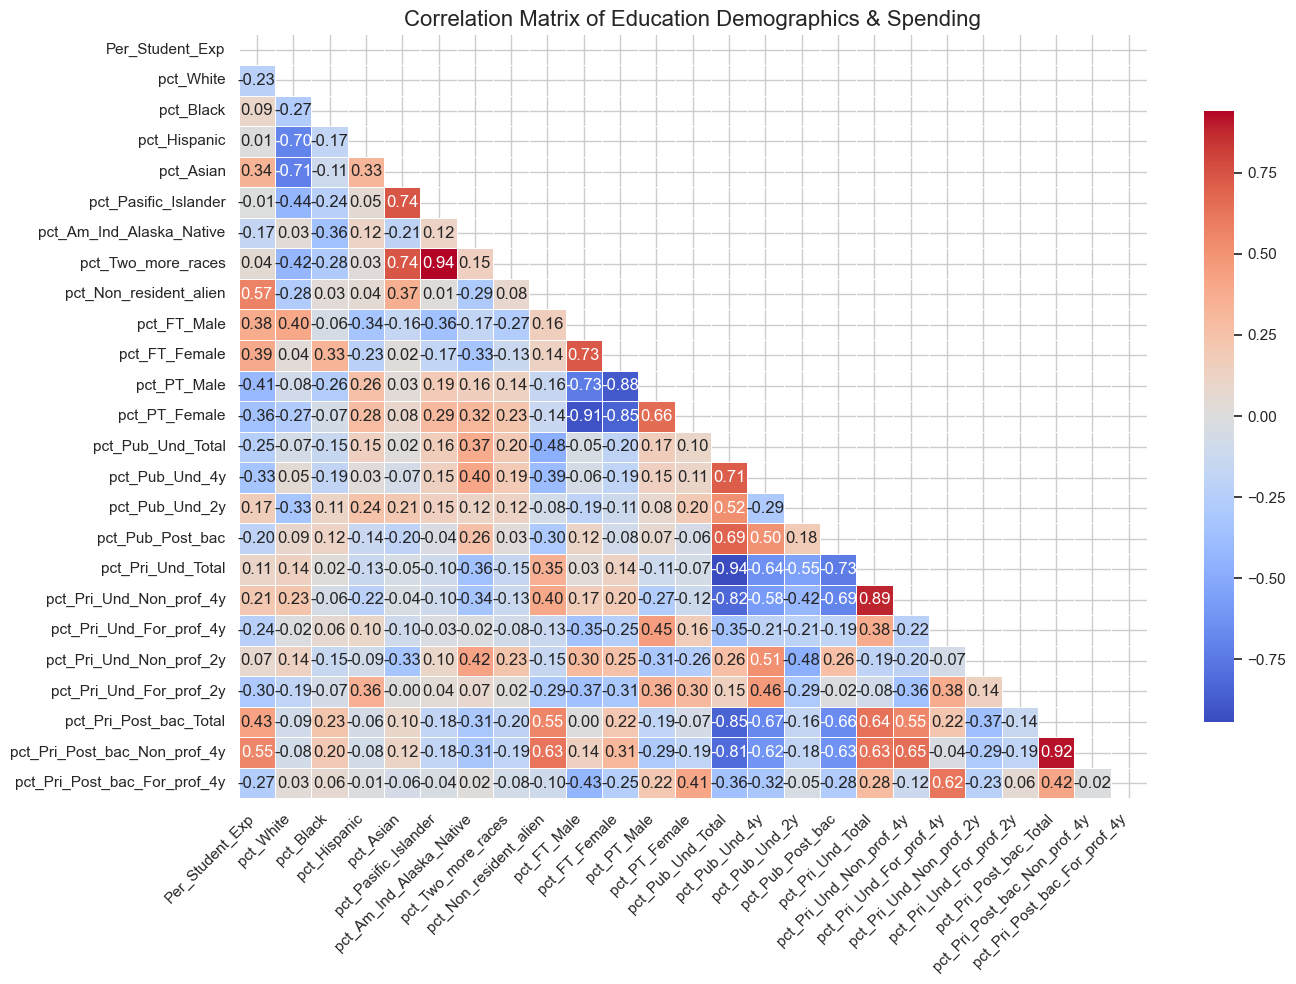

In [81]:
# Calculate the correlation matrix
corr_matrix = df_final.drop(columns=['State']).corr()

# Set up the figure
plt.figure(figsize=(14, 10))

# Generate a mask for the upper triangle 
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create the heatmap
sns.heatmap(corr_matrix, 
            mask=mask, 
            annot=True,           
            fmt=".2f",          
            cmap='coolwarm',      
            center=0,             
            linewidths=.5, 
            cbar_kws={"shrink": .8})

# Add titles and labels
plt.title('Correlation Matrix of Education Demographics & Spending', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.savefig('correlation_matrix_plot.png', dpi=300)
plt.show()

## Modeling:

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

## 1. Linear Regression:

#### 1.1. Linear Regression

In [48]:
df = df_final.copy()

# Define Variables 
y = df['Per_Student_Exp']
X = df.drop(columns=['State', 'Per_Student_Exp'])
# Handle missing values by imputing with mean
X = X.fillna(X.mean())

# Scale and Train
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LinearRegression() 
model.fit(X_scaled, y)
yhat = model.predict(X_scaled)

mean = mean_squared_error(y, yhat)
r2 = r2_score(y, yhat)

print(f'Mean Squared Error: {mean:.2f}')
print(f'R^2 Score: {r2:.4f}')

# See which factor drives the most spending
#importance = pd.Series(model.coef_, index=X.columns)
#print(importance.sort_values(ascending=False))
#print('Important coefficients:\n', importance.sort_values(ascending=False), sep='')

Mean Squared Error: 39.75
R^2 Score: 0.6509


#### 1.2. Linear Regression with train and test sets:

In [49]:
df = df_final.copy()

# Define Variables
y = df['Per_Student_Exp']
X = df.drop(columns=['State', 'Per_Student_Exp'])
X = X.fillna(X.mean())

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on the TEST set 
yhat = model.predict(X_test_scaled)

# Evaluate
mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)

print(f'Test Mean Squared Error: {mse:.2f}')
print(f'Test R^2 Score: {r2:.4f}')

# Coefficients (Still uses X.columns for labels)
#importance = pd.Series(model.coef_, index=X.columns)
#print('\nImportant coefficients:\n', importance.sort_values(ascending=False), sep='')

Test Mean Squared Error: 100.87
Test R^2 Score: -0.4472


## 2. Ridge Regression (with alpha=1.0):

#### 2.1. Ridge Reression:

In [50]:
df = df_final.copy()

# Define Variables 
y = df['Per_Student_Exp']
X = df.drop(columns=['State', 'Per_Student_Exp'])
# Handle missing values by imputing with mean
X = X.fillna(X.mean())

# Scale and Train
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = Ridge(alpha=1.0) 
model.fit(X_scaled, y)
yhat = model.predict(X_scaled)

mean = mean_squared_error(y, yhat)
r2 = r2_score(y, yhat)

print(f'Mean Squared Error: {mean:.2f}')
print(f'R^2 Score: {r2:.4f}')

# See which factor drives the most spending
#importance = pd.Series(model.coef_, index=X.columns)
#print(importance.sort_values(ascending=False))
#print('Important coefficients:\n', importance.sort_values(ascending=False), sep='')

Mean Squared Error: 40.27
R^2 Score: 0.6463


#### 2.2. Ridge Reression with train and test sets:

In [54]:
df = df_final.copy()

# Define Variables 
y = df['Per_Student_Exp']
X = df.drop(columns=['State', 'Per_Student_Exp'])
# Handle missing values by imputing with mean
X = X.fillna(X.mean())

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = Ridge(alpha=1.0) # Same alpha as before
model.fit(X_train_scaled, y_train)
yhat = model.predict(X_test_scaled)

mean = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)

print(f'Mean Squared Error: {mean:.2f}')
print(f'R^2 Score: {r2:.4f}')


# See which factor drives the most spending
#importance = pd.Series(model.coef_, index=X.columns)
#print(importance.sort_values(ascending=False))
#print('Important coefficients:\n', importance.sort_values(ascending=False), sep='')

Mean Squared Error: 60.97
R^2 Score: 0.1253


## 3. Ridge Regression (polynimial fit):
#### 3.1. Ridge Regression - polynomial fit:

In [ ]:
df = df_final.copy()
# Define Variables 
y = df['Per_Student_Exp']
X = df.drop(columns=['State', 'Per_Student_Exp'])
# Handle missing values by imputing with mean
X = X.fillna(X.mean())

# Scale and Train
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pr = PolynomialFeatures(degree=2, include_bias=False)
X_poly = pr.fit_transform(X_scaled)

model_poly = Ridge(alpha=1.0) 
model_poly.fit(X_poly, y)
yhat = model_poly.predict(X_poly)

mean = mean_squared_error(y, yhat)
r2 = r2_score(y, yhat)

print(f'Mean Squared Error: {mean:.2f}')
print(f'R^2 Score: {r2:.4f}')

# See which factor drives the most spending
#importance = pd.Series(model_poly.coef_, index=pr.get_feature_names_out(X.columns))
#print(importance.sort_values(ascending=False))
#print('Important coefficients:\n', importance.sort_values(ascending=False), sep='')

Mean Squared Error: 0.34
R^2 Score: 0.9970


#### 3.1. Ridge Regression (Polynomial - train-test split):

In [62]:
df = df_final.copy()
# Define Variables 
y = df['Per_Student_Exp']
X = df.drop(columns=['State', 'Per_Student_Exp'])
# Handle missing values by imputing with mean
X = X.fillna(X.mean())

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Scale the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pr = PolynomialFeatures(degree=2, include_bias=False)
X_train_pr = pr.fit_transform(X_train_scaled)
X_test_pr = pr.fit_transform(X_test_scaled)

model_poly_split = Ridge(alpha=1.0) 
model_poly_split.fit(X_train_pr, y_train)
yhat = model_poly_split.predict(X_test_pr)

mean = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)

print(f'Mean Squared Error: {mean:.2f}')
print(f'R^2 Score: {r2:.4f}')

# See which factor drives the most spending
#importance = pd.Series(model_poly_split.coef_, index=pr.get_feature_names_out(X.columns))
#print(importance.sort_values(ascending=False))
#print('Important coefficients:\n', importance.sort_values(ascending=False), sep='')

Mean Squared Error: 104.40
R^2 Score: -0.4979


## 4. Ridge Regression (with pipeline and Grid search):

In [65]:
df = df_final.copy()

# Define Variables 
y = df['Per_Student_Exp']
X = df.drop(columns=['State', 'Per_Student_Exp'])
# Handle missing values by imputing with mean
X = X.fillna(X.mean())

# Split the Data
# Pass X (imputed but not yet scaled) into the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Expand the search range
# Added higher alphas to fight that negative R2
parameters = {
    'polynomial__degree': [1, 2], # Degree 1 is just linear; good for comparison
    'ridge__alpha': [0.1, 1, 10, 100, 1000, 5000] 
}

# Setup the Pipeline
input_steps = [
    ('polynomial', PolynomialFeatures(include_bias=False)),
    ('scale', StandardScaler()),
    ('ridge', Ridge())
]
model_pipeline = Pipeline(input_steps)

# Setup and Fit the Grid Search
grid = GridSearchCV(model_pipeline, parameters, cv=5, scoring='r2')

# Fit the grid object
grid.fit(X_train, y_train)

# Extract Results
print(f"Best Parameters: {grid.best_params_}")
print(f"Best CV R2 Score: {grid.best_score_:.4f}")

# Evaluate on the Test Set (the real truth)
best_model = grid.best_estimator_
yhat = best_model.predict(X_test)
final_r2 = r2_score(y_test, yhat)

print(f"Final Test R2 Score: {final_r2:.4f}")

Best Parameters: {'polynomial__degree': 1, 'ridge__alpha': 100}
Best CV R2 Score: -0.0147
Final Test R2 Score: 0.3829


#### Here is the breakdown of what these numbers mean for education spending analysis:
**1. The "Degree 1":**  
The Grid Search chose Degree 1 over Degree 2. That means: "The relationships between demographics and spending are simple and linear.  
**2. Why is the CV Score Negative (-0.0147)?:**  
A negative $R^2$ in Cross-Validation (CV) means that when the model is trained on 4 out of 5 "folds" of the data, it performs worse than a simple horizontal line (the average).  
*The Reason:* With only 50 states, each "fold" in a 5-fold CV only has about 10 states. If one of those states is an extreme outlier (like Idaho), the model fails to predict it accurately, dragging the average score below zero.  
*The Takeaway:* The demographics (Race, Sex, etc.) are weak predictors on their own. There are other "hidden" factors—like state tax laws or cost-of-living that drive spending more than enrollment does.  
**3. Why is the Test Score Higher (0.3829)?:**  
The Final Test $R^2$ of 0.38 is actually a "win" in this context. It means that on the 20% of data held out at the very end, model explained about 38% of the variance in spending. This suggests that while the model isn't a "crystal ball," there is a statistically visible relationship between enrollment and spending.  
**4. Visualizing the "Failure" (Residuals):**  
Since the $R^2$ is low, the most important thing is to show where the model missed. This identifies the "Exceptions to the Rule."

### Validation Curve:

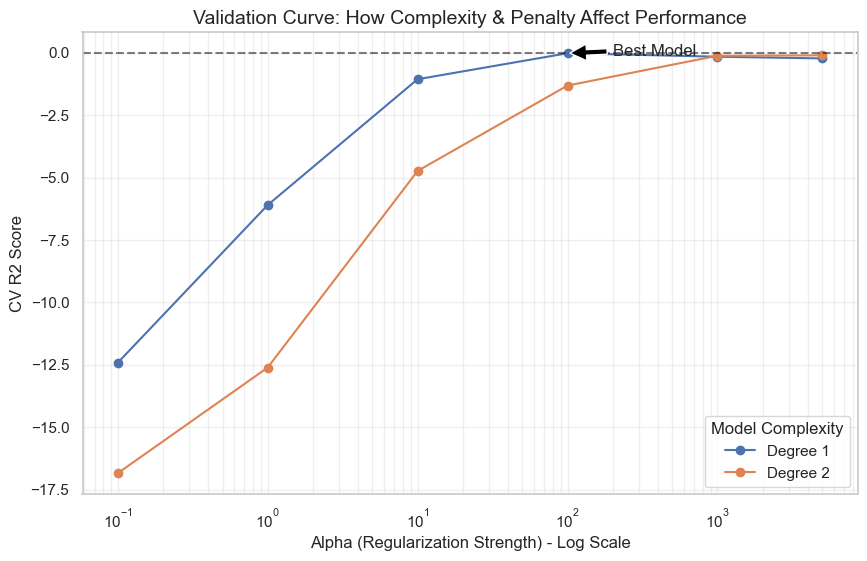

In [75]:
results = pd.DataFrame(grid.cv_results_)

plt.figure(figsize=(10, 6))

# Loop through each degree to plot its specific performance curve
for degree in [1, 2]:
    subset = results[results['param_polynomial__degree'] == degree]
    plt.semilogx(subset['param_ridge__alpha'], 
                 subset['mean_test_score'], 
                 label=f'Degree {degree}', 
                 marker='o')

# Add a horizontal line at 0 for context
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)

plt.title('Validation Curve: How Complexity & Penalty Affect Performance', fontsize=14)
plt.xlabel('Alpha (Regularization Strength) - Log Scale')
plt.ylabel('CV R2 Score')
plt.legend(title="Model Complexity")
plt.grid(True, which="both", ls="-", alpha=0.3)

# Highlight the best point found by GridSearch
plt.annotate('Best Model', 
             xy=(grid.best_params_['ridge__alpha'], grid.best_score_), 
             xytext=(grid.best_params_['ridge__alpha']*2, grid.best_score_ - 0.1),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.savefig('validation_curve_plot.png', dpi=300)
plt.show()

In [ ]:
%pip install statsmodels

### Residual Plots:

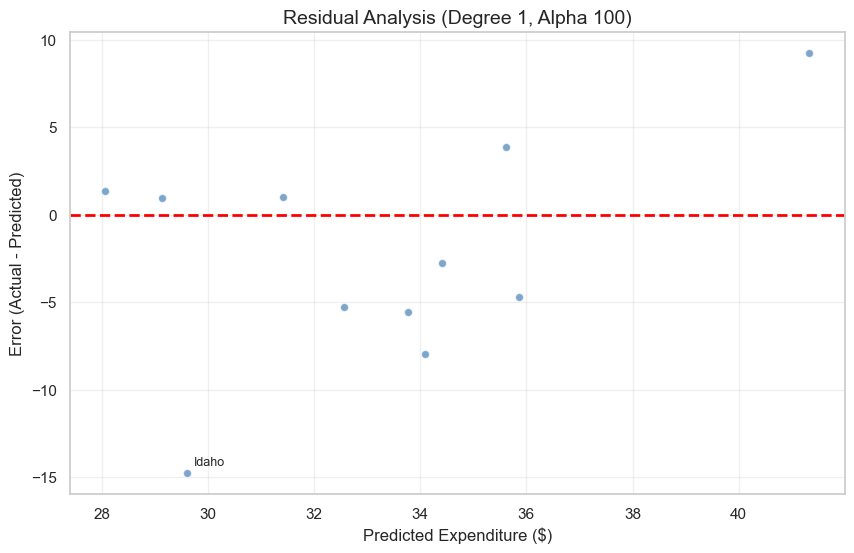

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Calculate predictions and residuals
yhat_test = best_model.predict(X_test)
residuals = y_test - yhat_test

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(yhat_test, residuals, alpha=0.7, color='steelblue', edgecolors='white')

# Add the zero-line and formatting
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residual Analysis (Degree 1, Alpha 100)', fontsize=14)
plt.xlabel('Predicted Expenditure ($)', fontsize=12)
plt.ylabel('Error (Actual - Predicted)', fontsize=12)
plt.grid(True, alpha=0.3)

# Identify the Outliers (States where the model missed by a lot)
# This uses the original State names from the dataframe
test_state_names = df_final.loc[y_test.index, 'State']

for i, state in enumerate(test_state_names):
    if abs(residuals.iloc[i]) > (1.5 * residuals.std()):
        plt.annotate(state, (yhat_test[i], residuals.iloc[i]), 
                     textcoords="offset points", xytext=(5,5), fontsize=9)

plt.savefig('residual_analysis_plot.png', dpi=300)
plt.show()

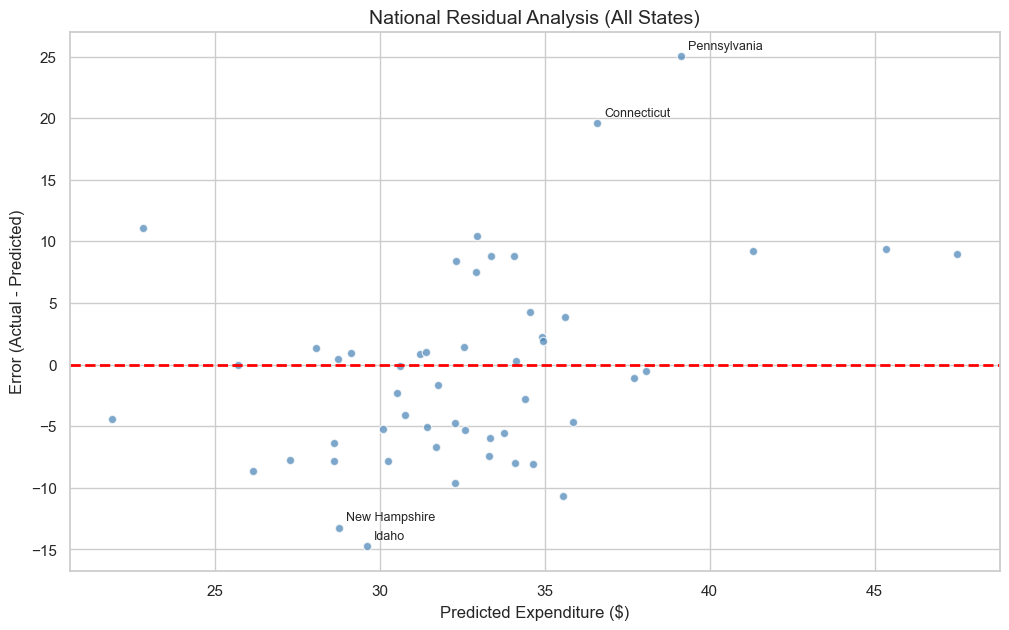

In [73]:
# Predict for the ENTIRE dataset (all states)
# Use the best_model from your grid search
yhat_all = best_model.predict(X)
residuals_all = y - yhat_all

# Plotting all ~50 points
plt.figure(figsize=(12, 7))
plt.scatter(yhat_all, residuals_all, alpha=0.7, color='steelblue', edgecolors='white')

# Add zero-line
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)

# Annotate all outliers across the whole country
all_state_names = df_final['State']
for i, state in enumerate(all_state_names):
    # Only label the ones that are significantly off (1.5 std devs)
    if abs(residuals_all.iloc[i]) > (1.5 * residuals_all.std()):
        plt.annotate(state, (yhat_all[i], residuals_all.iloc[i]), 
                     textcoords="offset points", xytext=(5,5), fontsize=9)

plt.title('National Residual Analysis (All States)', fontsize=14)
plt.xlabel('Predicted Expenditure ($)')
plt.ylabel('Error (Actual - Predicted)')
plt.savefig('national_residual_analysis_plot.png', dpi=300)
plt.show()

### Top Drivers:

In [ ]:
# Access the best model from the grid
best_pipe = grid.best_estimator_

# Get the feature names from the 'polynomial' step

poly_names = best_pipe.named_steps['polynomial'].get_feature_names_out(X.columns)

# Get the coefficients from the 'ridge' step
coeffs = best_pipe.named_steps['ridge'].coef_

# Combine into a Series for easy plotting
importance = pd.Series(coeffs, index=poly_names)


rename_dict = {
    'pct_Non_resident_alien': '% Non-Resident Alien Students',
    'pct_Pri_Post_bac_Non_prof_4y': '% Private Post-baccalaureate Non-Profit 4-Year',
    'pct_FT_Male': '% Full-Time Male Students',
    'pct_Asian': '% Asian Students',
    'pct_Pri_Post_bac_Total': '% Private Post-baccalaureate Total',
    
}

importance.index = [rename_dict.get(col, col) for col in importance.index]

print("Top Drivers of Expenditure (Standardized):")
print(importance.sort_values(ascending=False).head(5).round(2))

Top Drivers of Expenditure (Standardized):
% Non-Resident Alien Students                     1.35
% Private Post-baccalaureate Non-Profit 4-Year    0.99
% Full-Time Male Students                         0.70
% Asian Students                                  0.68
% Private Post-baccalaureate Total                0.66
dtype: float64


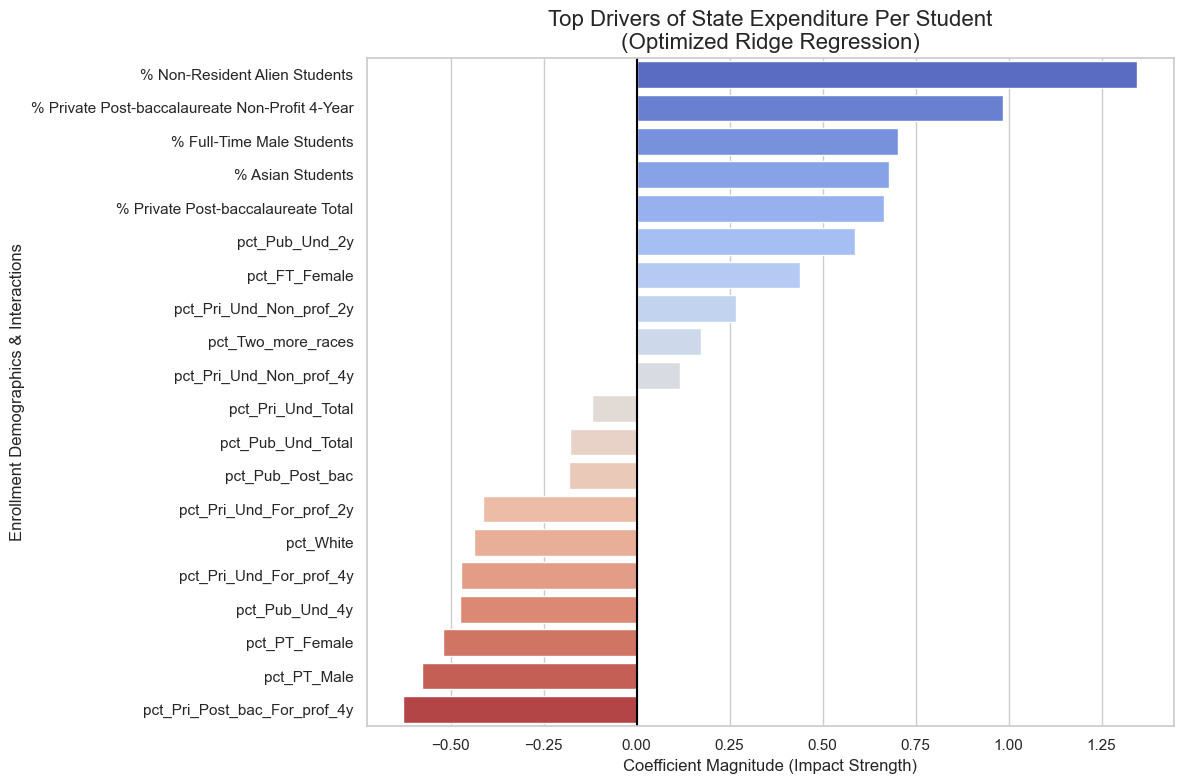

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort and Filter for the most impactful features
# We take the top 10 (highest positive) and bottom 10 (highest negative)
top_coeffs = importance.sort_values(ascending=False).head(10)
bottom_coeffs = importance.sort_values(ascending=False).tail(10)
plot_data = pd.concat([top_coeffs, bottom_coeffs])

# Set the style and size
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

# Create Horizontal Bar Plot
sns.barplot(x=plot_data.values, y=plot_data.index, palette='coolwarm')

# Final Polish
plt.axvline(x=0, color='black', linestyle='-', linewidth=1.5) # Stronger center line
plt.title('Top Drivers of State Expenditure Per Student\n(Optimized Ridge Regression)', fontsize=16)
plt.xlabel('Coefficient Magnitude (Impact Strength)', fontsize=12)
plt.ylabel('Enrollment Demographics & Interactions', fontsize=12)

plt.tight_layout()

# Save for your report
plt.savefig('final_coefficient_plot.png', dpi=300)
plt.show()